In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/fypalldata/mbti_1.csv")
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
df.type.value_counts()  #classes are imbalanced

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
check_nan_value_post=df['posts'].isnull().sum()
print('NaN value in post column are'+ " " + str(check_nan_value_post))



NaN value in post column are 0


<Axes: xlabel='type', ylabel='count'>

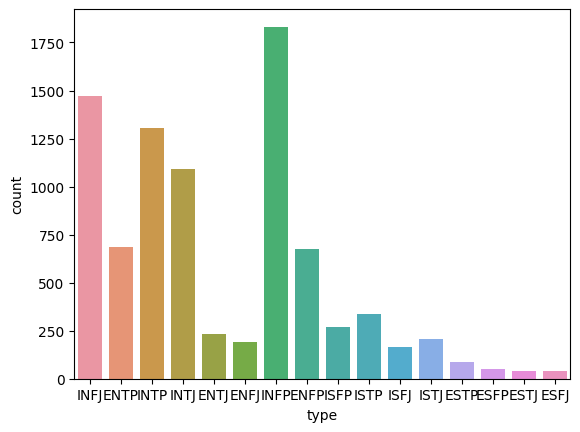

In [ ]:
sns.countplot(x=df["type"]) #since dataset is imbalanced so we will apply SMOTE

In [ ]:
features = ['posts']
X = df.loc[:, features]
y = df.loc[:, ['type']]

# Pre-Processing of **Dataset**

In [ ]:
#converting to lower case in nlp

df["posts"] = df["posts"].str.lower()
df["posts"]

0       'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1       'i'm finding the lack of me in these posts ver...
2       'good one  _____   https://www.youtube.com/wat...
3       'dear intp,   i enjoyed our conversation the o...
4       'you're fired.|||that's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edhb_h908||...
8671    'so...if this thread already exists someplace ...
8672    'so many questions when i do these things.  i ...
8673    'i am very conflicted right now when it comes ...
8674    'it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
for i in range(len(df)):
  post_temp=df._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')    #to match url links present in the post
  post_temp= re.sub(pattern, ' ', post_temp)                                            #to replace that url link with space
  df._set_value(i, 'posts',post_temp)

df['posts']

0       ' ||| |||enfp and intj moments     sportscente...
1       'i'm finding the lack of me in these posts ver...
2       'good one  _____    |||of course, to which i s...
3       'dear intp,   i enjoyed our conversation the o...
4       'you're fired.|||that's another silly misconce...
                              ...                        
8670    ' |||ixfp just because i always think of cats ...
8671    'so...if this thread already exists someplace ...
8672    'so many questions when i do these things.  i ...
8673    'i am very conflicted right now when it comes ...
8674    'it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
for i in range(len(df)):
  post_temp=df._get_value(i, 'posts')
  pattern = re.compile(r'[0-9]')                                    #to match numbers from 0 to 9
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile('\W+')                                       #to match alphanumeric characters
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile(r'[_+]')                 #to remve underscore and + sign
  post_temp= re.sub(pattern, ' ', post_temp)
  df._set_value(i, 'posts',post_temp)

df['posts']

0        enfp and intj moments sportscenter not top te...
1        i m finding the lack of me in these posts ver...
2        good one       of course to which i say i kno...
3        dear intp i enjoyed our conversation the othe...
4        you re fired that s another silly misconcepti...
                              ...                        
8670     ixfp just because i always think of cats as f...
8671     so if this thread already exists someplace el...
8672     so many questions when i do these things i wo...
8673     i am very conflicted right now when it comes ...
8674     it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
for i in range(len(df)):
  post_temp=df._get_value(i, 'posts')
  pattern = re.compile('\s+')                                     #to match multiple whitespaces
  post_temp= re.sub(pattern, ' ', post_temp)                      #to replace them with single whitespace
  df._set_value(i, 'posts', post_temp)

df['posts']

0        enfp and intj moments sportscenter not top te...
1        i m finding the lack of me in these posts ver...
2        good one of course to which i say i know that...
3        dear intp i enjoyed our conversation the othe...
4        you re fired that s another silly misconcepti...
                              ...                        
8670     ixfp just because i always think of cats as f...
8671     so if this thread already exists someplace el...
8672     so many questions when i do these things i wo...
8673     i am very conflicted right now when it comes ...
8674     it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object

# to remove stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
remove_words = stopwords.words("english")
for i in range(df.shape[0]):
  post_temp= df._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])    #to remove stopwords
  df._set_value(i, 'posts', post_temp)

df['posts']

0        enfp intj moments sportscenter top ten plays ...
1        finding lack posts alarming sex boring positi...
2        good one course say know blessing curse absol...
3        dear intp enjoyed conversation day esoteric g...
4        fired another silly misconception approaching...
                              ...                        
8670     ixfp always think cats fi doms reason especia...
8671     thread already exists someplace else post hec...
8672     many questions things would take purple pill ...
8673     conflicted right comes wanting children hones...
8674     long since personalitycafe although seem chan...
Name: posts, Length: 8675, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
for i in range(df.shape[0]):
  post_temp=df._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])   #to implement lemmetization i.e. to group together different forms of a word
  df._set_value(i, 'posts', post_temp)

df['posts']

0        enfp intj moment sportscenter top ten play pr...
1        finding lack post alarming sex boring positio...
2        good one course say know blessing curse absol...
3        dear intp enjoyed conversation day esoteric g...
4        fired another silly misconception approaching...
                              ...                        
8670     ixfp always think cat fi doms reason especial...
8671     thread already exists someplace else post hec...
8672     many question thing would take purple pill pi...
8673     conflicted right come wanting child honestly ...
8674     long since personalitycafe although seem chan...
Name: posts, Length: 8675, dtype: object

In [ ]:
#separating data and label

X_conv=df['posts'].values #post column in X  post column
Y= df['type'].values  #type variable in Y personality column

X_conv

array([' enfp intj moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear enfp favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo entp lady c

# Feature Engineering

In [ ]:
#converting textual data to numerical data

#idf stands for inverse document frequency repeating words which are not important for the model

vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')  #no of times a word is repeating in a document so repetition tells the model that word is very important so it assigns a value to it

vectorizer.fit(X_conv)

X_new=vectorizer.transform(X_conv)  #conversion of values to respective features

## (0 is the index and 15686 are the no of rows) 0.284 is he feature importance of that particular word in the document

print(X_new)

  (0, 4982)	0.07370402596465524
  (0, 4979)	0.05565020509541055
  (0, 4975)	0.022652796699206626
  (0, 4970)	0.059319403317236
  (0, 4937)	0.04614771553807196
  (0, 4934)	0.05358869998240537
  (0, 4872)	0.0860112694798825
  (0, 4867)	0.0793399982616137
  (0, 4859)	0.06966220475743416
  (0, 4847)	0.01890613058310806
  (0, 4844)	0.04248668662842222
  (0, 4827)	0.01952039174746034
  (0, 4822)	0.05489149797678041
  (0, 4815)	0.04439550668242666
  (0, 4782)	0.1153357957971278
  (0, 4773)	0.07993795381472812
  (0, 4739)	0.0410182717193756
  (0, 4733)	0.028530060273921944
  (0, 4659)	0.062148595625559494
  (0, 4643)	0.04866987556674918
  (0, 4553)	0.07391926718610996
  (0, 4541)	0.10460090748425933
  (0, 4517)	0.025198268414157874
  (0, 4514)	0.021552410690005592
  (0, 4509)	0.09110200505411986
  :	:
  (8674, 438)	0.040240488155563234
  (8674, 435)	0.03900687681646797
  (8674, 421)	0.07784139450836441
  (8674, 415)	0.04421563900019876
  (8674, 408)	0.048353561606591586
  (8674, 403)	0.0456705

# KFold **Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold #divide each of the classification categories in a uniform way
folds = StratifiedKFold(n_splits=10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in folds.split(X, y):
    # Split your dataset into training and testing sets for this fold
    X_new_train, X_new_test = X_new[train_index], X_new[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

In [ ]:
from sklearn.model_selection import cross_val_score

# 1. Logistic **Regression**

In [ ]:
#training model logistic regression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_new_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred_log = model_log.predict(X_new_test)

In [ ]:
# accuracy score on the training data
X_train_prediction = model_log.predict(X_new_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7966188524590164


In [ ]:
# accuracy score on the test data
X_test_prediction = model_log.predict(X_new_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6528258362168397


In [ ]:
print(X_new_test[200]) #what word was predicted is displayed here here we are shown the numerical values because we have not converted them into scalar form

  (0, 4991)	0.03971714673604053
  (0, 4985)	0.03373444327368452
  (0, 4980)	0.01704943194759778
  (0, 4960)	0.3339600710673275
  (0, 4948)	0.029316541457871204
  (0, 4942)	0.03438375926284969
  (0, 4941)	0.036477859693501535
  (0, 4937)	0.03341424775267966
  (0, 4934)	0.019401026433029423
  (0, 4905)	0.11922831176501547
  (0, 4903)	0.02610362377887535
  (0, 4902)	0.043853354773014414
  (0, 4860)	0.026418733013202692
  (0, 4847)	0.08213634724700139
  (0, 4844)	0.03076340088863856
  (0, 4827)	0.05653664095600904
  (0, 4819)	0.03428497624319327
  (0, 4782)	0.02783712267286743
  (0, 4780)	0.05543810545014621
  (0, 4752)	0.029375675837587396
  (0, 4739)	0.05940032686936396
  (0, 4734)	0.06230916688150131
  (0, 4733)	0.08263121944619153
  (0, 4697)	0.0381475811187305
  (0, 4691)	0.03211565647755374
  :	:
  (0, 344)	0.023454800613825967
  (0, 309)	0.04759083617706592
  (0, 296)	0.0570699919032553
  (0, 277)	0.0564244721643152
  (0, 252)	0.03973125093952038
  (0, 251)	0.03257169690143403
  (0,

In [ ]:
X_news = X_new_test[4]

prediction = model_log.predict(X_new_test[8])
print(prediction)

['ENTP']


# Calculating overall accuracy for Logistic Regression

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, pred_log)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6528258362168397


Text(77.92222222222227, 0.5, 'Actual')

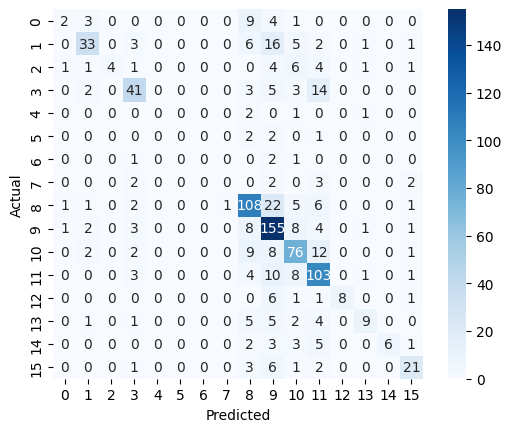

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
matrix_confusion= confusion_matrix(Y_test, pred_log)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
report= classification_report(Y_test, pred_log)
print(report)

              precision    recall  f1-score   support

        ENFJ       0.40      0.11      0.17        19
        ENFP       0.73      0.49      0.59        67
        ENTJ       1.00      0.17      0.30        23
        ENTP       0.68      0.60      0.64        68
        ESFJ       0.00      0.00      0.00         4
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         4
        ESTP       0.00      0.00      0.00         9
        INFJ       0.67      0.73      0.70       147
        INFP       0.62      0.85      0.72       183
        INTJ       0.63      0.69      0.66       110
        INTP       0.64      0.79      0.71       130
        ISFJ       1.00      0.47      0.64        17
        ISFP       0.64      0.33      0.44        27
        ISTJ       1.00      0.30      0.46        20
        ISTP       0.68      0.62      0.65        34

    accuracy                           0.65       867
   macro avg       0.54   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2. SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_svm = SVC(kernel='linear', random_state=0)
model_svm.fit(X_new_train, Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# accuracy score on the training data
X_train_prediction = model_svm.predict(X_new_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8897284836065574


In [ ]:
# accuracy score on the test data
X_test_prediction = model_svm.predict(X_new_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)# accuracy score on the test data


Accuracy score of the test data :  0.6562860438292965


In [ ]:
pred_svm = model_svm.predict(X_new_test)

In [ ]:
X_news = X_new_test[0]

prediction = model_svm.predict(X_new_test[1])
print(prediction)

['INFJ']


# Calculating overall accuracy for SVM

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, pred_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6562860438292965


Text(77.92222222222227, 0.5, 'Actual')

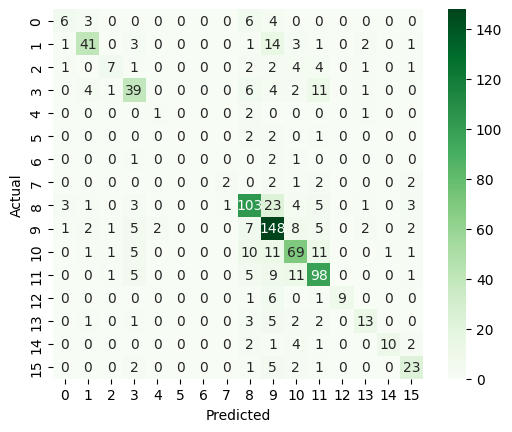

In [ ]:
matrix_confusion= confusion_matrix(Y_test, pred_svm)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
report= classification_report(Y_test, pred_svm)
print(report)

              precision    recall  f1-score   support

        ENFJ       0.50      0.32      0.39        19
        ENFP       0.77      0.61      0.68        67
        ENTJ       0.64      0.30      0.41        23
        ENTP       0.60      0.57      0.59        68
        ESFJ       0.33      0.25      0.29         4
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         4
        ESTP       0.67      0.22      0.33         9
        INFJ       0.68      0.70      0.69       147
        INFP       0.62      0.81      0.70       183
        INTJ       0.62      0.63      0.62       110
        INTP       0.69      0.75      0.72       130
        ISFJ       1.00      0.53      0.69        17
        ISFP       0.62      0.48      0.54        27
        ISTJ       0.91      0.50      0.65        20
        ISTP       0.64      0.68      0.66        34

    accuracy                           0.66       867
   macro avg       0.58   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=3)

# Fit dt to the training set
model_dt.fit(X_new_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=3)

In [ ]:
# accuracy score on the training data
X_train_prediction = model_dt.predict(X_new_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7165727459016393


In [ ]:
# accuracy score on the test data
X_test_prediction = model_dt.predict(X_new_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5167243367935409


In [ ]:
X_news = X_new_test[4]

prediction = model_dt.predict(X_new_test[8])
print(prediction)

['ENTP']


In [ ]:
pred_dt = model_dt.predict(X_new_test)

# Calculating Overall accuracy for decision tree

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, pred_dt)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5167243367935409


Text(77.92222222222227, 0.5, 'Actual')

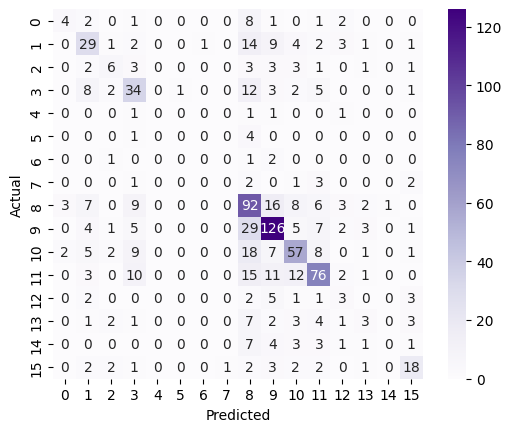

In [ ]:
matrix_confusion= confusion_matrix(Y_test, pred_dt)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Purples', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
report= classification_report(Y_test, pred_dt)
print(report)

              precision    recall  f1-score   support

        ENFJ       0.44      0.21      0.29        19
        ENFP       0.45      0.43      0.44        67
        ENTJ       0.35      0.26      0.30        23
        ENTP       0.44      0.50      0.47        68
        ESFJ       0.00      0.00      0.00         4
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         4
        ESTP       0.00      0.00      0.00         9
        INFJ       0.42      0.63      0.51       147
        INFP       0.65      0.69      0.67       183
        INTJ       0.56      0.52      0.54       110
        INTP       0.64      0.58      0.61       130
        ISFJ       0.17      0.18      0.17        17
        ISFP       0.21      0.11      0.15        27
        ISTJ       0.00      0.00      0.00        20
        ISTP       0.56      0.53      0.55        34

    accuracy                           0.52       867
   macro avg       0.31   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Ensemble Technique

In [ ]:
from sklearn.ensemble import VotingClassifier

After that, we create an ensemble model using the VotingClassifier class. We pass a list of tuples, where each tuple contains a name and a model instance. We set the voting parameter to 'hard', indicating that majority voting will be used to make predictions.

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[('tree', model_dt), ('svm', model_svm), ('logistic', model_log)],
    voting='hard'  # Use majority voting
)

In [ ]:
ensemble_model.fit(X_new_train, Y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=3)),
                             ('svm', SVC(kernel='linear', random_state=0)),
                             ('logistic', LogisticRegression(max_iter=1000))])

In [ ]:
ensemble_prediction = ensemble_model.predict(X_new_test)

In [ ]:
accuracy = accuracy_score(Y_test, ensemble_prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6608996539792388


In [ ]:
#@title
new_text = "I love to sing and dance"
new_text_tfidf = vectorizer.transform([new_text])

prediction = ensemble_model.predict(new_text_tfidf)

# # Print the prediction
print(prediction)

['ENFP']


In [ ]:
#@title
new_text = "I love to sing and dance"
new_text_tfidf = vectorizer.transform([new_text])

prediction = model_log.predict(new_text_tfidf)

# # Print the prediction
print(prediction)

In [ ]:
#@title
new_text = "I love being quite and drawing"
new_text_tfidf = vectorizer.transform([new_text])

predictionn = model_svm.predict(new_text_tfidf)

# # Print the prediction
print(predictionn)

In [ ]:
#@title
new_text = "outgoing and screaming and dancing and crying and talking"
new_text_tfidf = vectorizer.transform([new_text])

predictionn = model_dt.predict(new_text_tfidf)

# # Print the prediction
print(predictionn)

In [ ]:
import joblib

# Assuming you have trained a model named 'model_log' and a vectorizer named 'vectorizer'

# Save the trained model
joblib.dump(model_log, '/content/drive/MyDrive/fypalldata/trained_model.pkl')


In [ ]:
# Save the vectorizer
joblib.dump(vectorizer, '/content/drive/MyDrive/fypalldata/vectorizer.pkl')

In [ ]:
import joblib

# Assuming you have trained a model named 'model_log' and a vectorizer named 'vectorizer'

# Save the trained model
joblib.dump(model_svm, '/content/drive/MyDrive/fypalldata/trained_modelsvm.pkl')

In [ ]:
import joblib

# Assuming you have trained a model named 'model_log' and a vectorizer named 'vectorizer'

# Save the trained model
joblib.dump(model_dt, '/content/drive/MyDrive/fypalldata/trained_modeldt.pkl')

['/content/drive/MyDrive/fypalldata/trained_modeldt.pkl']

# Dumping our ensembled model

In [ ]:
import joblib

# Save the trained model
joblib.dump(ensemble_model, '/content/drive/MyDrive/fypalldata/en_model.pkl')

['/content/drive/MyDrive/fypalldata/en_model.pkl']

In [ ]:
import time

while True:
    print("Still running...")
    time.sleep(600)

Still running...
Still running...
Still running...


KeyboardInterrupt: ignored